[![Logo Optimus](images/logoOptimus.png)](https://hioptimus.com) 

[![PyPI version](https://badge.fury.io/py/optimuspyspark.svg)](https://badge.fury.io/py/optimuspyspark) [![Build Status](https://travis-ci.org/ironmussa/Optimus.svg?branch=master)](https://travis-ci.org/ironmussa/Optimus) [![Documentation Status](https://readthedocs.org/projects/optimus-ironmussa/badge/?version=latest)](http://optimus-ironmussa.readthedocs.io/en/latest/?badge=latest)  [![built_by iron](https://img.shields.io/badge/built_by-iron-FF69A4.svg)](http://ironmussa.com) [![Updates](https://pyup.io/repos/github/ironmussa/Optimus/shield.svg)](https://pyup.io/repos/github/ironmussa/Optimus/)  [![GitHub release](https://img.shields.io/github/release/ironmussa/optimus.svg)](https://github.com/ironmussa/Optimus/) 
[![Codacy Badge](https://api.codacy.com/project/badge/Grade/02b3ba0fe2b64d6297c6b8320f8b15a7)](https://www.codacy.com/app/argenisleon/Optimus?utm_source=github.com&amp;utm_medium=referral&amp;utm_content=ironmussa/Optimus&amp;utm_campaign=Badge_Grade)
[![Coverage Status](https://coveralls.io/repos/github/ironmussa/Optimus/badge.svg?branch=master)](https://coveralls.io/github/ironmussa/Optimus?branch=master) [![Mentioned in Awesome Data Science](https://awesome.re/mentioned-badge.svg)](https://github.com/bulutyazilim/awesome-datascience)  [![Join the chat at https://gitter.im/optimuspyspark/Lobby](https://badges.gitter.im/optimuspyspark/Lobby.svg)](https://gitter.im/optimuspyspark/Lobby?utm_source=badge&utm_medium=badge&utm_campaign=pr-badge&utm_content=badge)  

To launch a live notebook server to test optimus using binder or Colab, click on one of the following badges:

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ironmussa/Optimus/master)
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ironmussa/Optimus/blob/master/examples/10_min_from_spark_to_pandas_with_optimus.ipynb)

Optimus is the missing framework to profile, clean, process and do ML in a distributed fashion using Apache Spark(PySpark).

## Installation (pip):  
  
In your terminal just type  `pip install optimuspyspark`

### Requirements
* Apache Spark>= 2.4.0  
* Python>=3.6  

## Examples 

You can go to the 10 minutes to Optimus [notebook](https://github.com/ironmussa/Optimus/blob/master/examples/10_min_from_spark_to_pandas_with_optimus.ipynb) where you can find the basic to start working. 

Also you can go to the [examples](examples/) folder to found specific notebooks about data cleaning, data munging, profiling, data enrichment and how to create ML and DL models.

Besides check the [Cheat Sheet](https://htmlpreview.github.io/?https://github.com/ironmussa/Optimus/blob/master/docs/cheatsheet/optimus_cheat_sheet.html) 

## Documentation
  
[![Documentation](https://media.readthedocs.com/corporate/img/header-logo.png)](http://docs.hioptimus.com/en/latest/)  
  
## Feedback 
Feedback is what drive Optimus future, so please take a couple of minutes to help shape the Optimus' Roadmap:  https://optimusdata.typeform.com/to/aEnYRY  

Also if you want to a suggestion or feature request use https://github.com/ironmussa/optimus/issues
 
## Start Optimus

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [4]:
from optimus import Optimus
op= Optimus()

You also can use an already created Spark session:

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('optimus').getOrCreate()
op= Optimus(spark)

## Loading data
Now Optimus can load data in csv, json, parquet, avro, excel from a local file or URL.

In [6]:
#csv
df = op.load.csv("examples/data/foo.csv")

#json
# Use a local file
df = op.load.json("examples/data/foo.json")
# Use a url
df = op.load.json("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.json")

# parquet
df = op.load.parquet("examples/data/foo.parquet")

# avro
# df = op.load.avro("examples/data/foo.avro").table(5)

# excel 
df = op.load.excel("examples/data/titanic3.xls")

Also you can create a dataframe from scratch

In [7]:
from pyspark.sql.types import *
from datetime import date, datetime

df = op.create.df(
    [
        ("names", "str", True), 
        ("height(ft)","int", True), 
        ("function", "str", True), 
        ("rank", "int", True), 
        ("age","int",True),
        ("weight(t)","float",True),
        ("japanese name", ArrayType(StringType()), True),
        ("last position seen", "str", True),
        ("date arrival", "str", True),
        ("last date seen", "str", True),
        ("attributes", ArrayType(FloatType()), True),
        ("DateType"),
        ("Tiemstamp"),
        ("Cybertronian", "bool", True), 
        ("NullType", "null", True),
    ],
    [
        ("Optim'us", 28, "Leader", 10, 5000000, 4.3, ["Inochi", "Convoy"], "19.442735,-99.201111", "1980/04/10",
         "2016/09/10", [8.5344, 4300.0], date(2016, 9, 10), datetime(2014, 6, 24), True,
         None),
        ("bumbl#ebéé  ", 17, "Espionage", 7, 5000000, 2.0, ["Bumble", "Goldback"], "10.642707,-71.612534", "1980/04/10",
         "2015/08/10", [5.334, 2000.0], date(2015, 8, 10), datetime(2014, 6, 24), True,
         None),
        ("ironhide&", 26, "Security", 7, 5000000, 4.0, ["Roadbuster"], "37.789563,-122.400356", "1980/04/10",
         "2014/07/10", [7.9248, 4000.0], date(2014, 6, 24), datetime(2014, 6, 24), True,
         None),
        ("Jazz", 13, "First Lieutenant", 8, 5000000, 1.80, ["Meister"], "33.670666,-117.841553", "1980/04/10",
         "2013/06/10", [3.9624, 1800.0], date(2013, 6, 24), datetime(2014, 6, 24), True, None),
        ("Megatron", None, "None", 10, 5000000, 5.70, ["Megatron"], None, "1980/04/10", "2012/05/10", [None, 5700.0],
         date(2012, 5, 10), datetime(2014, 6, 24), True, None),
        ("Metroplex_)^$", 300, "Battle Station", 8, 5000000, None, ["Metroflex"], None, "1980/04/10", "2011/04/10",
         [91.44, None], date(2011, 4, 10), datetime(2014, 6, 24), True, None),

    ], infer_schema = True).h_repartition(1)

With .table() you hace a beautifull way to show your data. You have extra informacion like column number, column data type and marked white spaces 


In [8]:
df.table_image("images/table.png")

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


## Cleaning and Processing
  
Optimus V2 was created to make data cleaning a breeze. The API was designed to be super easy to newcomers and very familiar for people that comes from Pandas.
Optimus expand the Spark DataFrame functionality adding .rows and .cols attributes.

For example you can load data from a url, transform and apply some predefined cleaning functions:

In [9]:
# This is a custom function
def func(value, arg):
    return "this was a number"
    
new_df = df\
    .rows.sort("rank","desc")\
    .withColumn('new_age', df.age)\
    .cols.lower(["names","function"])\
    .cols.date_transform("date arrival", "yyyy/MM/dd", "dd-MM-YYYY")\
    .cols.years_between("date arrival", "dd-MM-YYYY", output_cols = "from arrival")\
    .cols.remove_accents("names")\
    .cols.remove_special_chars("names")\
    .rows.drop(df["rank"]>8)\
    .cols.rename(str.lower)\
    .cols.trim("*")\
    .cols.unnest("japanese name", output_cols="other names")\
    .cols.unnest("last position seen",separator=",", output_cols="pos")\
    .cols.drop(["last position seen", "japanese name","date arrival", "cybertronian", "nulltype"])

# .cols.apply_by_dtypes("product",func=func, func_return_type="string", data_type="integer")\
# .cols.replace("product","taaaccoo","taco")\
# .cols.replace("product",["piza","pizzza"],"pizza")\

You transform this

In [10]:
df.table_image("images/table1.png")

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


Into this

In [11]:
new_df.table_image("images/table2.png")

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


Note that you can use Optimus functions and Spark functions(`.WithColumn()`) and all the df function availables in a Spark Dataframe at the same time. To know about all the Optimus functionality please go to this [notebooks](examples/)

### Custom functions
Spark have multiple ways to transform your data like rdd, Column Expression ,udf and pandas udf. In Optimus we create the `apply()` and `apply_expr` which handle all the implementation complexity.

Here you apply a function to the "billingid" column. Sum 1 and 2 to the current column value. All powered by Pandas UDF

In [12]:
def func(value, args):
    return value + args[0] + args[1]

df.cols.apply("height(ft)",func,"int", [1,2]).table_image("images/table3.png")

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


If you want to apply a Column Expression use `apply_expr()` like this. In this case we pasa an argument 10 to divide the actual column value

In [13]:
from pyspark.sql import functions as F

def func(col_name, args):
    return F.col(col_name)/20

df.cols.apply("height(ft)", func=func, args=20).table_image("images/table4.png")

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


You can change the table output back to ascii if you which

In [14]:
op.output("ascii")

To return to HTML just:

In [15]:
op.output("html")

## Data profiling

Optimus comes with a powerful and unique data profiler. Besides basic and advance stats like min, max, kurtosis, mad etc, 
it also let you know what type of data has every column. For example if a string column have string, integer, float, bool, date Optimus can give you an unique overview about your data. 
Just run `df.profile("*")` to profile all the columns. For more info about the profiler please go to this [notebook](examples/new-api-profiler.ipynb).

Let's load a "big" dataset

In [16]:
df = op.load.csv("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/Meteorite_Landings.csv").h_repartition()

### Numeric

Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'nametype'
Including 'nan' as Null in processing 'recclass'
Including 'nan' as Null in processing 'fall'
Including 'nan' as Null in processing 'year'
Including 'nan' as Null in processing 'GeoLocation'


Number of columns,10
Number of rows,45716
Total Missing (%),0.49%
Total size in memory,-1 Bytes
String,0
Numeric,1
Date,0
Bool,0
Array,0
Not available,0
Unique,12497

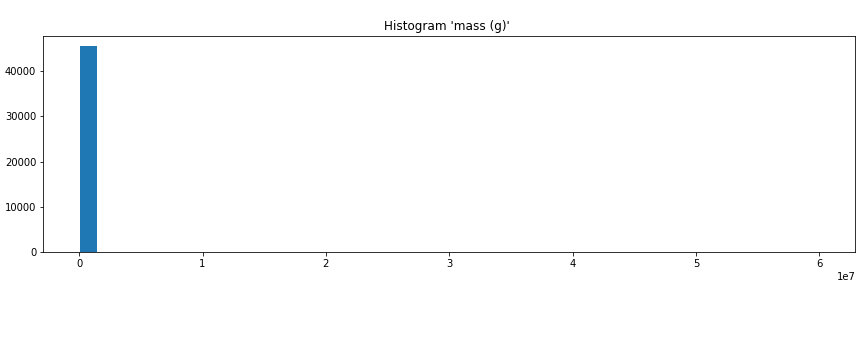
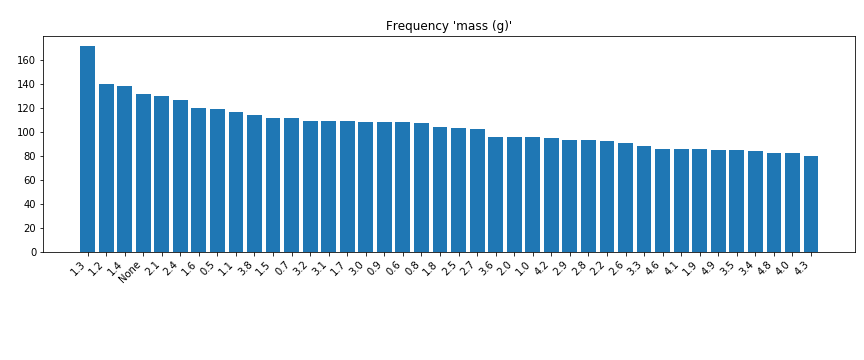

In [40]:
op.profiler.run(df, "mass (g)", infer=False)

In [41]:
op.profiler.to_image(path="images/profiler_numeric.png")

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'nametype'
Including 'nan' as Null in processing 'recclass'
Including 'nan' as Null in processing 'fall'
Including 'nan' as Null in processing 'year'
Including 'nan' as Null in processing 'GeoLocation'


Number of columns,10
Number of rows,45716
Total Missing (%),0.49%
Total size in memory,-1 Bytes
String,1
Numeric,0
Date,0
Bool,0
Array,0
Not available,0
Unique,45515

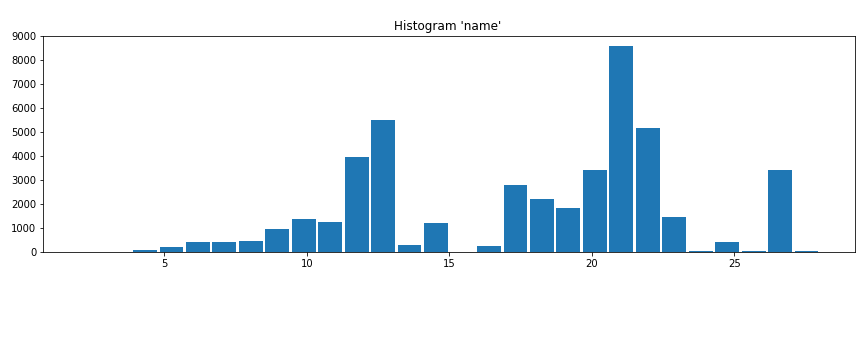
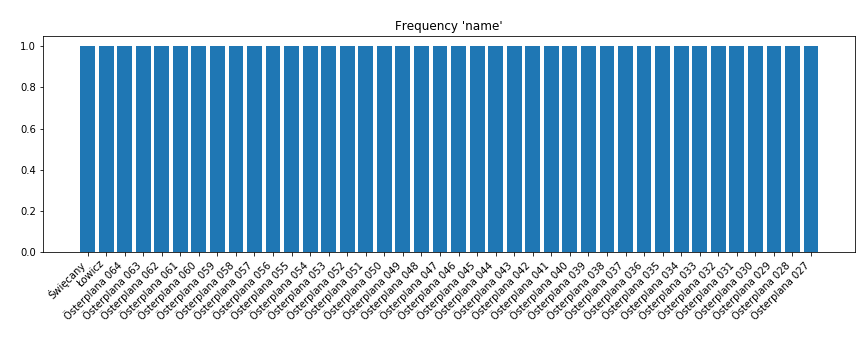

In [30]:
op.profiler.run(df, "name", infer=False)

In [35]:
op.profiler.to_image(path="images/profiler.png")

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


For dates data types Optimus can give you extra data

Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'nametype'
Including 'nan' as Null in processing 'recclass'
Including 'nan' as Null in processing 'fall'
Including 'nan' as Null in processing 'year'
Including 'nan' as Null in processing 'GeoLocation'


Number of columns,10
Number of rows,45716
Total Missing (%),0.49%
Total size in memory,-1 Bytes
String,0
Numeric,0
Date,1
Bool,0
Array,0
Not available,0
Unique,265

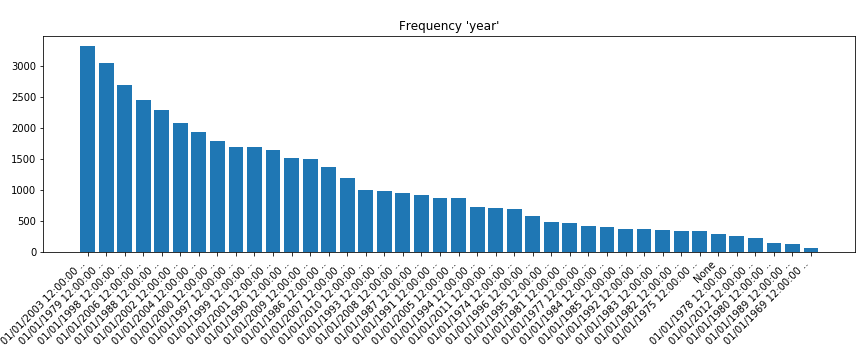
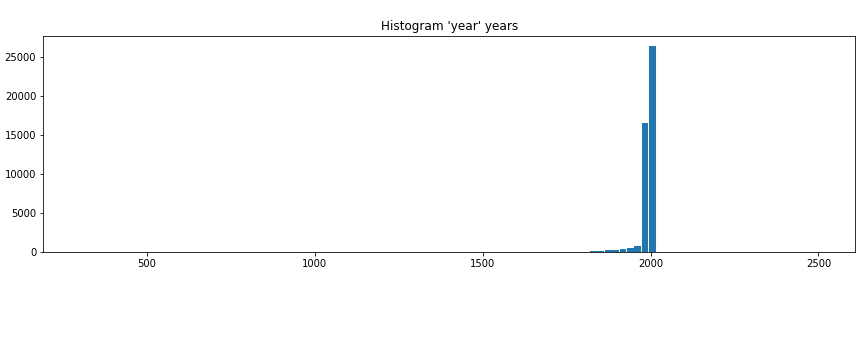
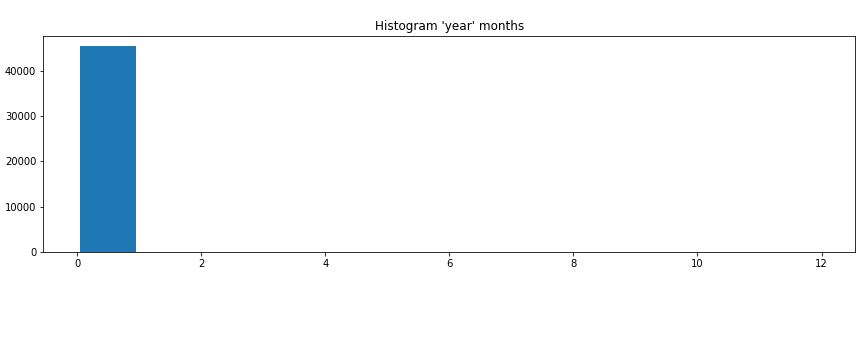
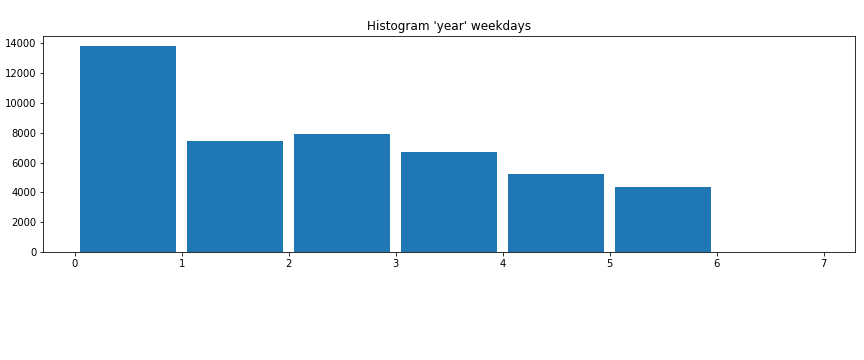
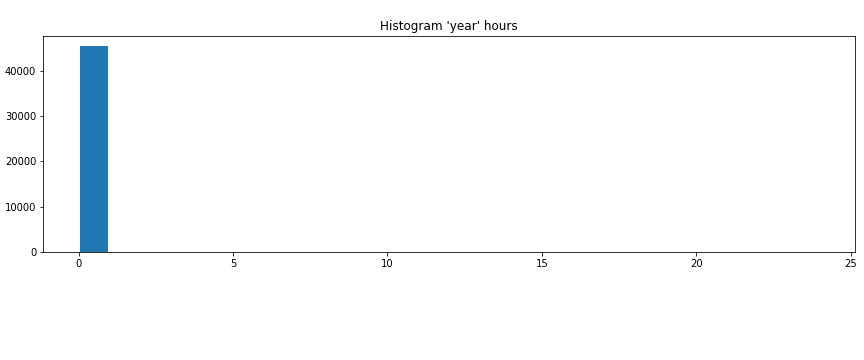
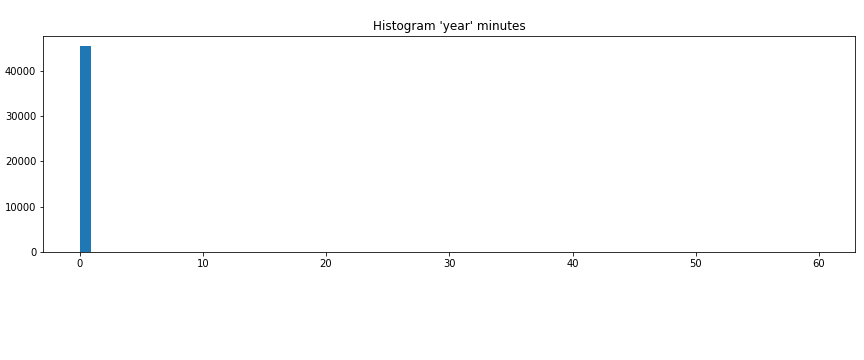

In [36]:
op.profiler.run(df, "year", infer=True)

In [37]:
op.profiler.to_image(path="images/profiler1.png")

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


## Plots
Besides histograms, frequency plots you also have scatter plots and box plots. All powered by Apache by pyspark

In [42]:
df = op.load.excel("examples/data/titanic3.xls")
df = df.rows.drop_na(["age","fare"])

In [43]:
df.plot.hist("fare", output="image", path="images/hist.png")

In [44]:
df.plot.frequency("age", output="image", path="images/frequency.png")

In [45]:
df.plot.scatter(["fare", "age"], buckets=30, output="image", path="images/scatter.png")

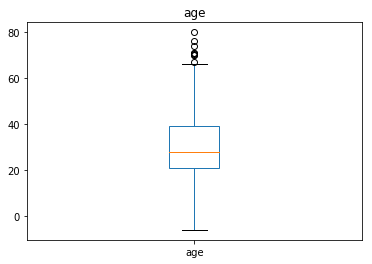

In [46]:
df.plot.box("age", output="image", path="images/box.png")

object of type <class 'float'> cannot be safely interpreted as an integer.


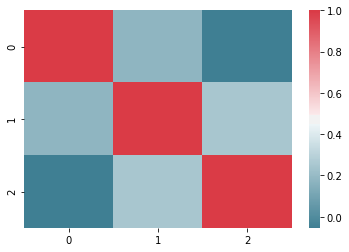

In [47]:
df.plot.correlation(["age","fare","survived"])

### Using other plotting libraries

Optimus has a tiny API so you can use any plotting library. For example, you can use df.cols.scatter(), df.cols.frequency(), df.cols.boxplot() or df.cols.hist() to output a JSON that you can process to adapt the data to any plotting library.

## Outliers

### Get the ouliers using iqr

In [48]:
df.outliers.iqr("age").select().table_image("images/table5.png")

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


### Remove the outliers using iqr

In [49]:
df.outliers.iqr("age").drop().table_image("images/table6.png")

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


### You can also use z_score, modified_z_score or mad




In [50]:
df.outliers.z_score("age", threshold=2).drop()
df.outliers.modified_z_score("age", threshold = 2).drop()
df.outliers.mad("age", threshold = 2).drop()

DataFrame[pclass: bigint, survived: bigint, name: string, sex: string, age: double, sibsp: bigint, parch: bigint, ticket: string, fare: double, cabin: string, embarked: string, boat: string, body: double, home_dest: string]

## Database connection
Optimus have handy tools to connect to databases and extract informacion. Optimus can handle Redshift, postgres and mysql




## Data enrichment

You can connect to any external API to enrich your data using Optimus. Optimus use MongoDB to download the data and then merge it with the Spark Dataframe. You need to install MongoDB

Let's load a tiny dataset we can enrich

In [51]:
df = op.load.json("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.json")

In [52]:
import requests

def func_request(params):
    # You can use here whatever header or auth info you need to send. 
    # For more information see the requests library
    
    url= "https://jsonplaceholder.typicode.com/todos/" + str(params["id"])
    return requests.get(url)

def func_response(response):
    # Here you can parse de response
    return response["title"]


e = op.enrich()

df_result = e.run(df, func_request, func_response, calls= 60, period = 60, max_tries = 8)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 538.0 failed 1 times, most recent failure: Lost task 0.0 in stage 538.0 (TID 6754, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 377, in main
    process()
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 372, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 2499, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 2499, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 2499, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 352, in func
    return f(iterator)
  File "/home/argenis/Documents/Optimus/optimus/io/save.py", line 184, in _mongo
    collection.insert_one(as_dict)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/collection.py", line 700, in insert_one
    session=session),
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/collection.py", line 614, in _insert
    bypass_doc_val, session)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/collection.py", line 602, in _insert_one
    acknowledged, _insert_command, session)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/mongo_client.py", line 1279, in _retryable_write
    with self._tmp_session(session) as s:
  File "/home/argenis/anaconda3/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/mongo_client.py", line 1611, in _tmp_session
    s = self._ensure_session(session)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/mongo_client.py", line 1598, in _ensure_session
    return self.__start_session(True, causal_consistency=False)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/mongo_client.py", line 1551, in __start_session
    server_session = self._get_server_session()
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/mongo_client.py", line 1584, in _get_server_session
    return self._topology.get_server_session()
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/topology.py", line 429, in get_server_session
    None)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/topology.py", line 200, in _select_servers_loop
    self._error_message(selector))
pymongo.errors.ServerSelectionTimeoutError: localhost:27017: [Errno 111] Connection refused

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:452)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:588)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:571)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:406)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$class.foreach(Iterator.scala:891)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:945)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:121)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:403)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:409)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 377, in main
    process()
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 372, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 2499, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 2499, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 2499, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 352, in func
    return f(iterator)
  File "/home/argenis/Documents/Optimus/optimus/io/save.py", line 184, in _mongo
    collection.insert_one(as_dict)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/collection.py", line 700, in insert_one
    session=session),
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/collection.py", line 614, in _insert
    bypass_doc_val, session)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/collection.py", line 602, in _insert_one
    acknowledged, _insert_command, session)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/mongo_client.py", line 1279, in _retryable_write
    with self._tmp_session(session) as s:
  File "/home/argenis/anaconda3/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/mongo_client.py", line 1611, in _tmp_session
    s = self._ensure_session(session)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/mongo_client.py", line 1598, in _ensure_session
    return self.__start_session(True, causal_consistency=False)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/mongo_client.py", line 1551, in __start_session
    server_session = self._get_server_session()
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/mongo_client.py", line 1584, in _get_server_session
    return self._topology.get_server_session()
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/topology.py", line 429, in get_server_session
    None)
  File "/home/argenis/anaconda3/lib/python3.7/site-packages/pymongo/topology.py", line 200, in _select_servers_loop
    self._error_message(selector))
pymongo.errors.ServerSelectionTimeoutError: localhost:27017: [Errno 111] Connection refused

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:452)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:588)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:571)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:406)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$class.foreach(Iterator.scala:891)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:945)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:121)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:403)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:409)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [ ]:
df_result.table_image("images/table7.png")

## Machine Learning 

Machine Learning is one of the last steps, and the goal for most Data Science WorkFlows.

Apache Spark created a library called MLlib where they coded great algorithms for Machine Learning. Now
with the ML library we can take advantage of the Dataframe API and its optimization to create easily
Machine Learning Pipelines.

Even though this task is not extremely hard, is not easy. The way most Machine Learning models work on Spark
are not straightforward, and they need lots feature engineering to work. That's why we created the feature engineering
section inside Optimus.

One of the best "tree" models for machine learning is Random Forest. What about creating a RF model with just
one line? With Optimus is really easy.

In [ ]:
df_cancer =op.load.csv("https://raw.githubusercontent.com/ironmussa/Optimus/master/tests/data_cancer.csv")

In [ ]:
columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
           'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
           'fractal_dimension_mean']
df_predict, rf_model = op.ml.random_forest(df_cancer, columns, "diagnosis")

This will create a DataFrame with the predictions of the Random Forest model.

So lets see the prediction compared with the actual label:


In [ ]:
df_predict.cols.select(["label","prediction"]).table_image("images/table8.png")

The rf_model variable contains the Random Forest model for analysis.
 
## Contributing to Optimus
Contributions go far beyond pull requests and commits. We are very happy to receive any kind of contributions   
including:  
  
* [Documentation](https://github.com/ironmussa/Optimus/tree/master/docs/source) updates, enhancements, designs, or   bugfixes.  
* Spelling or grammar fixes.  
* README.md corrections or redesigns.  
* Adding unit, or functional [tests](https://github.com/ironmussa/Optimus/tree/master/tests)   
* Triaging GitHub issues -- especially determining whether an issue still persists or is reproducible.  
* [Searching #optimusdata on twitter](https://twitter.com/search?q=optimusdata) and helping someone else who needs help.  
* [Blogging, speaking about, or creating tutorials](https://hioptimus.com/category/blog/)   about Optimus and its many features.  
* Helping others in our optimus [gitter channel](https://gitter.im/optimuspyspark/Lobby).    
  
## Backers  
[[Become a backer](https://opencollective.com/optimus#backer)] and get your image on our README on Github with a link to your site.  
[![OpenCollective](https://opencollective.com/optimus/backers/badge.svg)](#backers)   

## Sponsors  
[[Become a sponsor](https://opencollective.com/optimus#backer)] and get your image on our README on Github with a link to your site.  
[![OpenCollective](https://opencollective.com/optimus/sponsors/badge.svg)](#sponsors)  
  
## Optimus for Spark 1.6.x  
  
Optimus main stable branch will work now for Spark 2.3.1 The 1.6.x version is now under maintenance, the last tag release for this Spark version is the 0.4.0. We strongly suggest that you use the >2.x version of the framework because the new improvements and features will be added now on this version.
## Core Team
Argenis Leon and Favio Vazquez

## Contributors:
Here is the amazing people that make Optimus possible:
  
[![0](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/0)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/0)[![1](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/1)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/1)[![2](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/2)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/2)[![3](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/3)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/3)[![4](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/4)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/4)[![5](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/5)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/5)[![6](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/6)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/6)[![7](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/7)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/7)    
   
## License:  
  
Apache 2.0 © [Iron](https://github.com/ironmussa)  
  
[![Logo Iron](https://iron-ai.com/wp-content/uploads/2017/08/iron-svg-2.png)](https://ironmussa.com)  
  
<a href="https://twitter.com/optimus_data"><img src="https://www.shareicon.net/data/256x256/2015/09/01/94063_circle_512x512.png" alt="Optimus twitter" border="0" height="60"></a>

# Post-process readme

Process the readme file to remove header from jupytext, python comments and convert/add table to images

In [5]:
from shutil import copyfile
output_file = "README.md"
copyfile("readme_.md", output_file)

import sys
import fileinput
import re

pattern = r'"([A-Za-z0-9_\./\\-]*)"'

jupytext_header = False
flag_remove = False

for i, line in enumerate(fileinput.input(output_file, inplace=1)):
    done= False
    try:
        # Remove some helper lines
#         for r in remove:
#             if re.search(r, line):
#                 line.strip()
#                 done= True
        
        #Remove the post process code
        if re.search("Post-process", line):
            flag_remove = True
            
        if flag_remove is True:
            line.strip()
            done = True        
            
        
        # Remove jupytext header
        if jupytext_header is True:
            line.strip()
            done = True
            
        if  "---\n" == line: 
            jupytext_header = not jupytext_header      
                    
        elif done is False:
     
            # Replace .table_image(...) by table()
            chars_table=re.search(".table_image", line)
            chars_image=re.search(".to_image", line)
            
            if chars_table:
                line.strip()
                print(line[0:int(chars_table.start())]+".table()")

                m = re.search(r'table_image\("(.*?)"\)', line).group(1)
                if m:
                    buffer = "![]("+ m + ")"              
            elif chars_image:
#                 line.strip()
                m = re.search(r'to_image\(path="(.*?)"\)', line).group(1)
                if m:
                    buffer = "![]("+ m + ")"  
            else:
                sys.stdout.write(line)
                
            if "```\n"==line and buffer:
                
#                 print("```")
                print(buffer)
#                 print("```")
                buffer = None
                
                            
                    
    except Exception as e:
        print(e)
        
fileinput.close()

In [55]:
re.search(r'to_image\(path="(.*?)"\)', 'op.profiler.to_image(path="images/profiler.png")').group(1)

'images/profiler.png'